# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2.02001E+12,2020,10219808,-0.254001,51.462262,3,1,1,4/2/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2.02001E+12,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2.02001E+12,2020,10228005,-0.178719,51.529614,3,1,1,1/1/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2.02001E+12,2020,10228006,-0.001683,51.541210,2,1,1,1/1/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2.02001E+12,2020,10228011,-0.137592,51.515704,3,1,2,1/1/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [4]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head()

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known


In [5]:
#missing value count
accidents.isnull().sum()

accident_index                              0
accident_year                               0
accident_reference                          0
longitude                                  14
latitude                                   14
accident_severity                           0
number_of_vehicles                          0
number_of_casualties                        0
date                                        0
day_of_week                                 0
time                                        0
first_road_class                            0
first_road_number                           0
road_type                                   0
speed_limit                                 0
junction_detail                             0
junction_control                            0
second_road_class                           0
second_road_number                          0
pedestrian_crossing_human_control           0
pedestrian_crossing_physical_facilities     0
light_conditions                  

In [6]:
#drop missing values
accidents = accidents.dropna()
accidents.isnull().sum()

accident_index                             0
accident_year                              0
accident_reference                         0
longitude                                  0
latitude                                   0
accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
date                                       0
day_of_week                                0
time                                       0
first_road_class                           0
first_road_number                          0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
second_road_class                          0
second_road_number                         0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_co

In [7]:
major_incidents = accidents.copy()[((accidents['accident_severity'] == 1) & (accidents['number_of_casualties'] >= 3))]
major_incidents.describe()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
count,202.0,202.000000,202.000000,202.0,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,2020.0,-1.456909,52.822646,1.0,2.361386,3.727723,4.410891,3.574257,976.569307,5.480198,...,5.767327,158.094059,0.009901,0.351485,2.658416,1.628713,1.475248,0.138614,0.123762,1.757426
std,0.0,1.531212,1.597268,0.0,1.227015,1.529193,2.126469,1.276239,1814.370167,1.262590,...,0.798208,941.257461,0.140720,1.499659,2.124754,1.560000,0.632362,0.816858,0.697921,0.429705
min,2020.0,-5.660176,50.290974,1.0,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2020.0,-2.260795,51.630392,1.0,2.000000,3.000000,3.000000,3.000000,16.000000,6.000000,...,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000
50%,2020.0,-1.426011,52.614902,1.0,2.000000,3.000000,5.000000,3.000000,141.500000,6.000000,...,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000
75%,2020.0,-0.345738,53.562637,1.0,3.000000,4.000000,6.000000,4.000000,663.000000,6.000000,...,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000
max,2020.0,1.664742,58.593227,1.0,8.000000,19.000000,7.000000,6.000000,8024.000000,9.000000,...,6.000000,9011.000000,2.000000,8.000000,6.000000,9.000000,5.000000,7.000000,6.000000,2.000000


In [8]:
major_incidents.dtypes

accident_index                              object
accident_year                                int64
accident_reference                          object
longitude                                  float64
latitude                                   float64
accident_severity                            int64
number_of_vehicles                           int64
number_of_casualties                         int64
date                                        object
day_of_week                                  int64
time                                        object
first_road_class                             int64
first_road_number                            int64
road_type                                    int64
speed_limit                                  int64
junction_detail                              int64
junction_control                             int64
second_road_class                            int64
second_road_number                           int64
pedestrian_crossing_human_contr

## Day and Time Analysis

In [9]:
#join date and time column to create date_time column
major_incidents['date_time'] = major_incidents[['date', 'time']].agg(' '.join, axis=1)

#create datetime object
major_incidents['date_time'] = pd.to_datetime(major_incidents['date_time'])

In [10]:
#group data by time(hourly)
times = pd.DatetimeIndex(major_incidents.date_time)
grouped = major_incidents.groupby(times.hour)

#count incidents
time_values = grouped.count()['date_time'].sort_index(ascending = True)
time_values

date_time
0      4
1      5
2      4
3      6
4      5
5      8
6      4
7      3
8      6
9      4
10    10
11     7
12     9
13    10
14    12
15    13
16    11
17    16
18    17
19     5
20    12
21    12
22    15
23     4
Name: date_time, dtype: int64

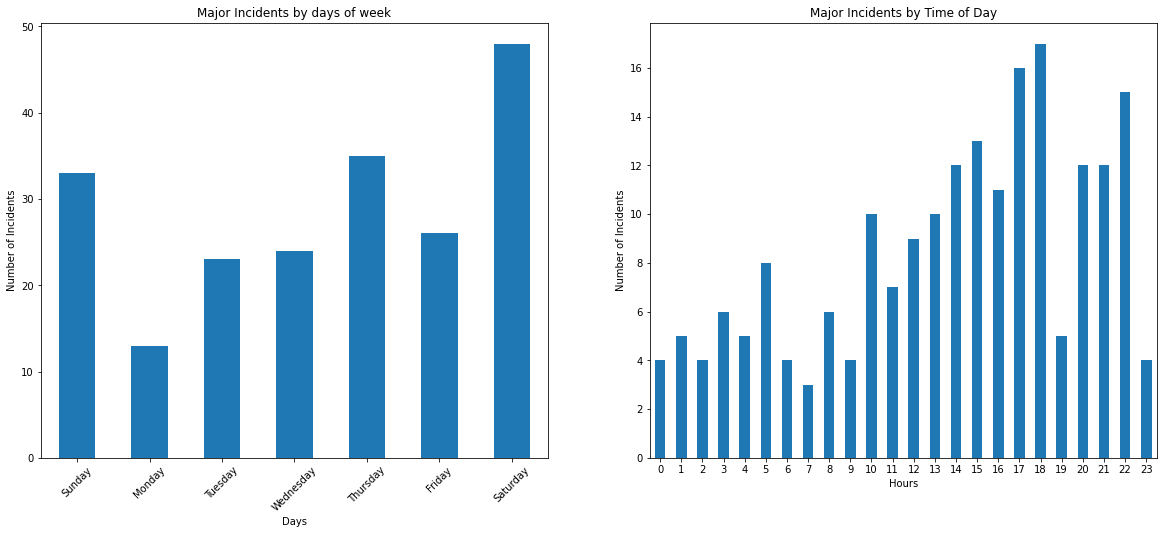

In [11]:
plt.figure(figsize=(20,8))
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#plot of major incidents by day of week
plt.subplot(1,2,1)
major_incidents['day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title('Major Incidents by days of week')
plt.xlabel('Days')
plt.xticks(range(len(labels)), labels, rotation = 45)
plt.ylabel('Number of Incidents')

#plot of major incidents by time of day
plt.subplot(1,2,2)
time_values.plot(kind='bar')
plt.title('Major Incidents by Time of Day')
plt.xlabel('Hours')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Number of Incidents')

plt.show()

<font color = red > **We can see that most major incidents occured on Saturday, with a total of 48 incidents and that the highest number of major incidents was recorded between 17:00 hours and 18:59 hours.**

## Day and Night Time Analysis
 
***Dividing the major icidents into day and night, we can understand at what period that most accidents occur.*** <br>
**Day: 7am - 6pm <br>
  Night: 6pm - 7am**
  
***Note that this is not perfect split of day and night but it is used for analysis purpose.***

In [12]:
#dividing data into day and night
day = major_incidents.copy()[major_incidents['date_time'].dt.hour.between(7,18)]
night = major_incidents.copy()[~(major_incidents['date_time'].dt.hour.between(7,18))]

print(day.shape)
print(night.shape)
print(day['date_time'].dt.hour.unique())
print(night['date_time'].dt.hour.unique())

(118, 28)
(84, 28)
[13 12 14 10 18  9  7 15 16 17 11  8]
[ 5 22  3  6 23 21  0  2  4 20  1 19]


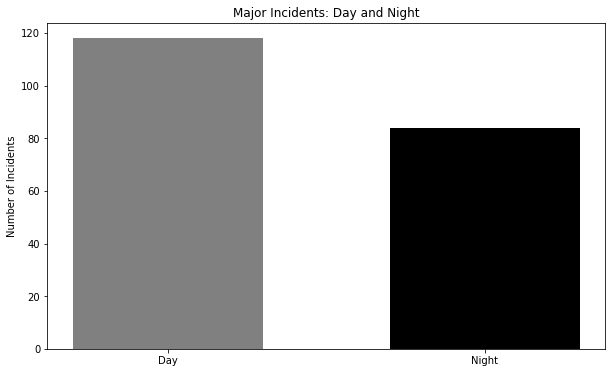

In [44]:
day['date_time'].count()
night['date_time'].count()

y = [118, 84]
x = ['Day', 'Night']

#plot of incidents count by day and night
plt.figure(figsize=(10,6))
plt.bar(x,y, width=0.6, color=['grey', 'black'])
plt.title('Major Incidents: Day and Night')
plt.ylabel('Number of Incidents')
plt.show()

<font color = red>**We have more major incidents ocurring in the day time than at night.
Lets further investigate on what days of the week and at what time do these incidents occur.**

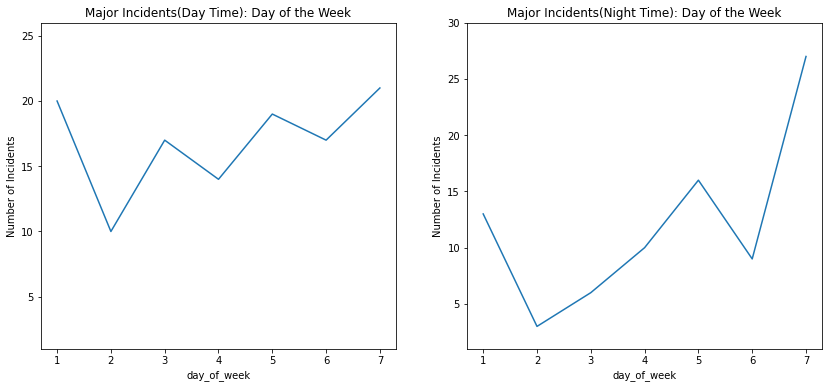

In [48]:
by_dayofweek = day.groupby('day_of_week').count()
by_dayofweek_night = night.groupby('day_of_week').count()

#plot of 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
by_dayofweek['date'].plot.line()
plt.title('Major Incidents(Day Time): Day of the Week')
plt.ylim(1,26)
plt.ylabel('Number of Incidents')

plt.subplot(1,2,2)
by_dayofweek_night['date'].plot.line()
plt.title('Major Incidents(Night Time): Day of the Week')
plt.ylim(1,30)
plt.ylabel('Number of Incidents')
plt.show()

<font color=red> **We see that most major incidents were recorded on weekends (Saturday and Sunday) during the day time and at night time Saturday also has the highest record. <br>
This could be attributed to people going on weekend vacation or road trips and as such, having more vehicles than usual on the road**</font>

### Further investigation into the incidents by work days and weekends would give more insight to possible causes of these incidents.

In [15]:
day['hour'] = day['date_time'].dt.hour
#spliting day data into work days and weekend
bussiness_days = day.copy()[day['day_of_week'].between(2,6)]# 2 is Monday and 6 is Friday
weekend = day.copy()[~(day['day_of_week'].between(2,6))]

by_hour_business = bussiness_days.groupby('hour').count()
by_hour_weekend = weekend.groupby('hour').count()

print(by_hour_business['date'])
print(by_hour_weekend['date'])
print(bussiness_days['day_of_week'].unique())
print(weekend['day_of_week'].unique())

hour
7      3
8      5
9      4
10     6
11     5
12     6
13     7
14     5
15    10
16     7
17     9
18    10
Name: date, dtype: int64
hour
8     1
10    4
11    2
12    3
13    3
14    7
15    3
16    4
17    7
18    7
Name: date, dtype: int64
[5 2 4 6 3]
[1 7]


In [16]:
night['hour'] = night['date_time'].dt.hour
#spliting night data into work days and weekend
bussiness_days = night.copy()[night['day_of_week'].between(2,6)]# 2 is Monday and 6 is Friday
weekend = night.copy()[~(night['day_of_week'].between(2,6))]

by_hour_business_night = bussiness_days.groupby('hour').count()
by_hour_weekend_night = weekend.groupby('hour').count()

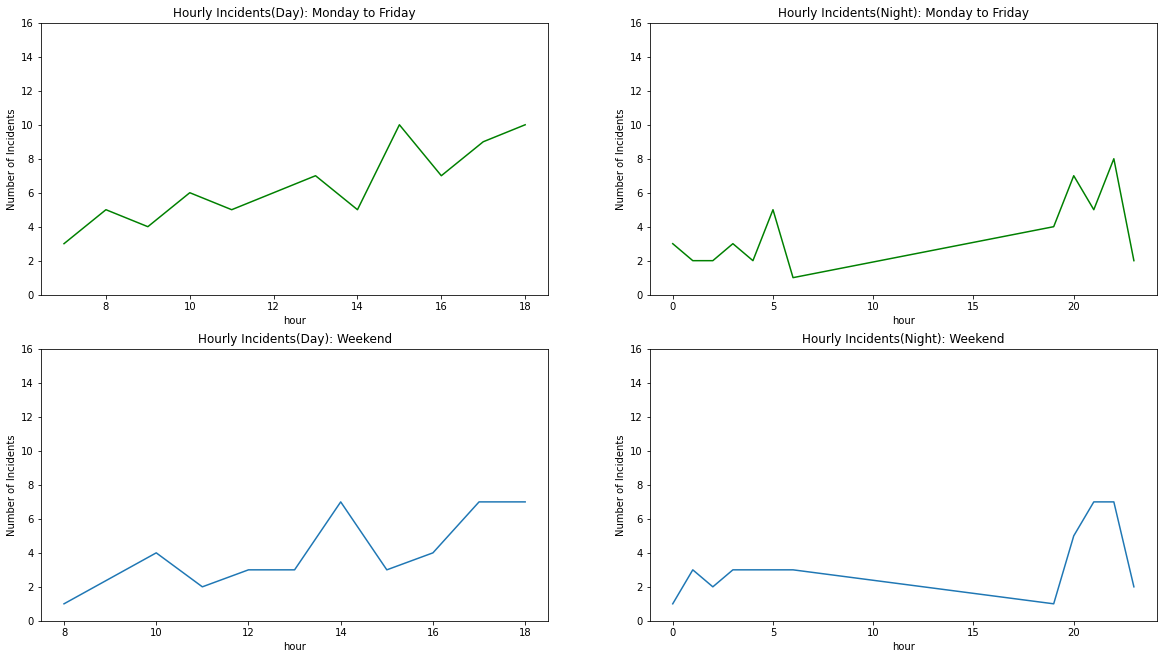

In [50]:
plt.figure(figsize=(20,11))

#plot of hourly business days incidents in the day
plt.subplot(2,2,1)
by_hour_business['date'].plot.line(color='g')
plt.ylim(0,16)
plt.title('Hourly Incidents(Day): Monday to Friday')
plt.ylabel('Number of Incidents')

#plot of business days incidents at night 
plt.subplot(2,2,2)
by_hour_business_night['date'].plot.line(color='g')
plt.ylim(0,16)
plt.title('Hourly Incidents(Night): Monday to Friday')
plt.ylabel('Number of Incidents')

#plot of hourly weekend incidents in the day
plt.subplot(2,2,3)
by_hour_weekend['date'].plot.line()
plt.ylim(0,16)
plt.title('Hourly Incidents(Day): Weekend')
plt.ylabel('Number of Incidents')

#plot of weekend incdents at night
plt.subplot(2,2,4)
by_hour_weekend_night['date'].plot.line()
plt.ylim(0,16)
plt.title('Hourly Incidents(Night): Weekend')
plt.ylabel('Number of Incidents')

plt.show()

<font color=red>**1. It can be seen that majority of the day-time incidents recorded on work days occurred between 15:00 and 18:00 hours. This is closing time rush hour and it could be a casue.**<br>

**2. A pattern is also seen that both work days and weekends record high number of incidents between 20:00 and 23:00. This is possibly a result of low visibility.**

## Compararison of Important Incident Characteristics

In [18]:
minor_incidents = accidents.copy()[~((accidents['accident_severity'] == 1) & (accidents['number_of_casualties'] >= 3))]
minor_incidents.describe()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
count,90983.0,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,...,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000,90983.000000
mean,2020.0,-1.188664,52.350026,2.772144,1.834090,1.261928,4.120825,4.221745,790.017729,5.255476,...,5.551323,220.317708,0.353791,1.187288,2.063935,1.702087,1.391458,0.245013,0.180748,1.321983
std,0.0,1.367353,1.326737,0.449529,0.675138,0.668466,1.931747,1.443503,1580.002808,1.685643,...,1.015456,913.556360,1.700035,2.447422,1.746437,1.846170,0.926255,1.319547,1.150683,0.467239
min,2020.0,-7.497375,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,2020.0,-2.107112,51.457189,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,6.000000,...,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,2020.0,-1.044820,51.761278,3.000000,2.000000,1.000000,4.000000,4.000000,33.000000,6.000000,...,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2020.0,-0.125194,53.295858,3.000000,2.000000,1.000000,6.000000,6.000000,537.000000,6.000000,...,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000
max,2020.0,1.756257,60.541144,3.000000,13.000000,41.000000,7.000000,6.000000,9174.000000,9.000000,...,6.000000,9174.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,2.000000


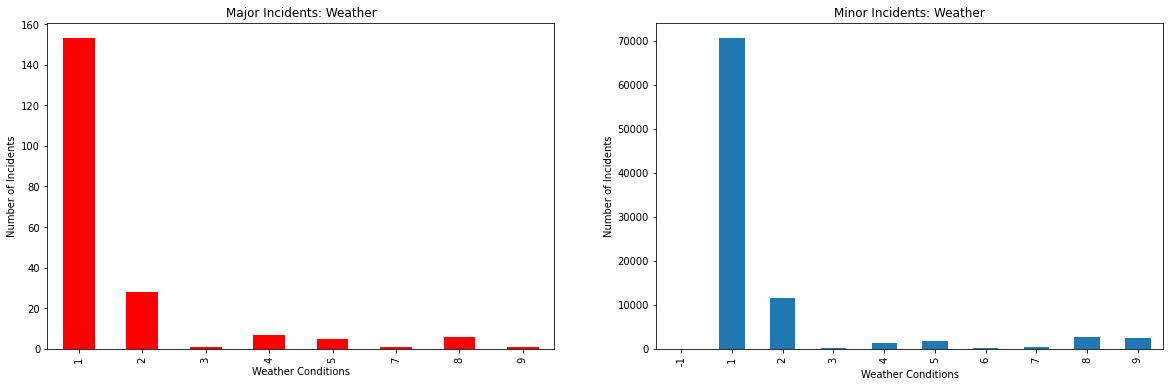

In [32]:
plt.subplot(1,2,1)
major_incidents['weather_conditions'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color = 'red')
plt.title('Major Incidents: Weather')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Incidents')

plt.subplot(1,2,2)
minor_incidents['weather_conditions'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Weather')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Incidents')

plt.show()

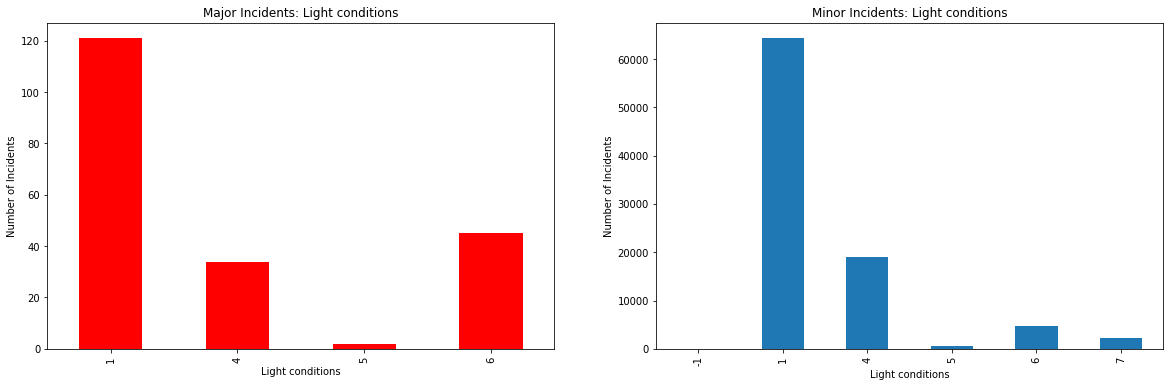

In [35]:
plt.subplot(1,2,1)
major_incidents['light_conditions'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: Light conditions')
plt.xlabel('Light conditions')
plt.ylabel('Number of Incidents')

plt.subplot(1,2,2)
minor_incidents['light_conditions'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: Light conditions')
plt.xlabel('Light conditions')
plt.ylabel('Number of Incidents')
plt.show()

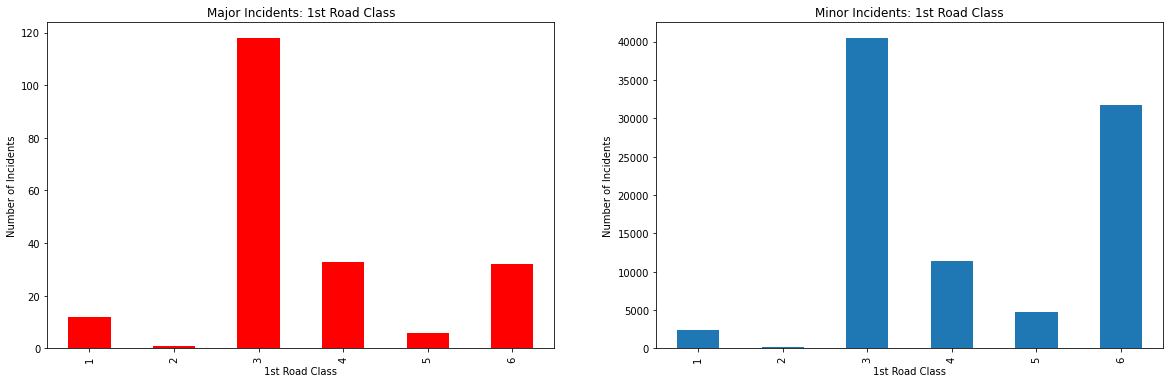

In [40]:
plt.subplot(1,2,1)
major_incidents['first_road_class'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), color='r')
plt.title('Major Incidents: 1st Road Class')
plt.xlabel('1st Road Class')
plt.ylabel('Number of Incidents')


plt.subplot(1,2,2)
minor_incidents['first_road_class'].value_counts().sort_index().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: 1st Road Class')
plt.xlabel('1st Road Class')
plt.ylabel('Number of Incidents')


plt.show()

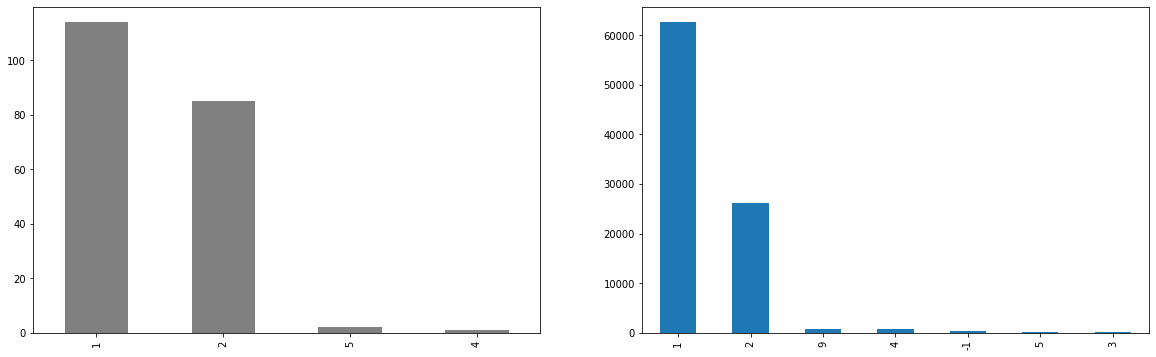

In [43]:
plt.subplot(1,2,1)
major_incidents['road_surface_conditions'].value_counts().plot(kind='bar', figsize=(20,6), color='grey')
plt.title('Major Incidents: Road urface Conditions')
plt.xlabel('1st Road Class')
plt.ylabel('Number of Incidents')

plt.subplot(1,2,2)
minor_incidents['road_surface_conditions'].value_counts().plot(kind='bar', figsize=(20,6))
plt.title('Minor Incidents: 1st Road Class')
plt.xlabel('1st Road Class')
plt.ylabel('Number of Incidents')

plt.show()

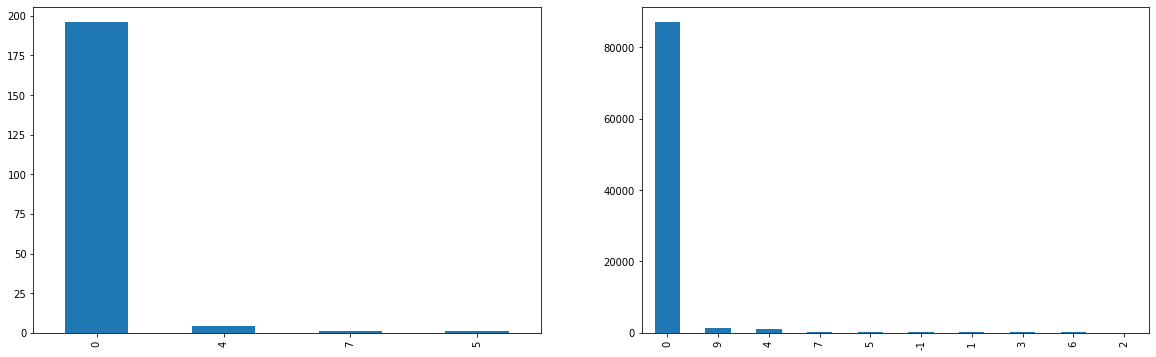

In [24]:
plt.subplot(1,2,1)
major_incidents['special_conditions_at_site'].value_counts().plot(kind='bar', figsize=(20,6))

plt.subplot(1,2,2)
minor_incidents['special_conditions_at_site'].value_counts().plot(kind='bar', figsize=(20,6))

plt.show()

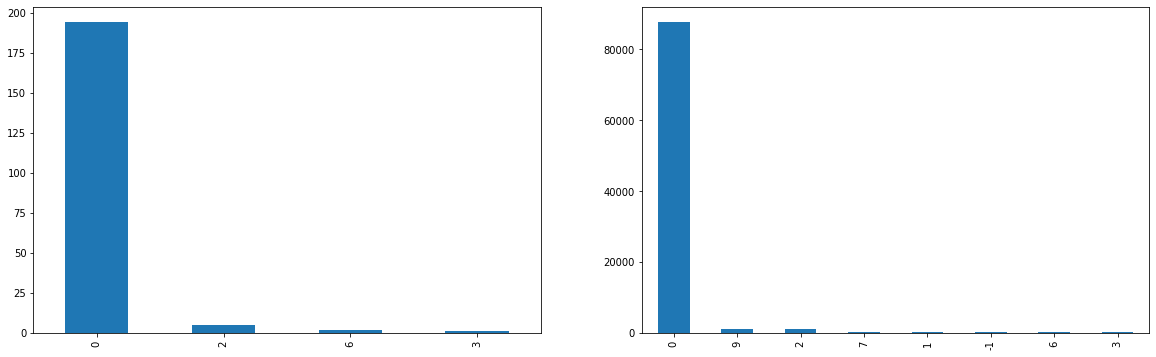

In [25]:
plt.subplot(1,2,1)
major_incidents['carriageway_hazards'].value_counts().plot(kind='bar', figsize=(20,6))

plt.subplot(1,2,2)
minor_incidents['carriageway_hazards'].value_counts().plot(kind='bar', figsize=(20,6))

plt.show()

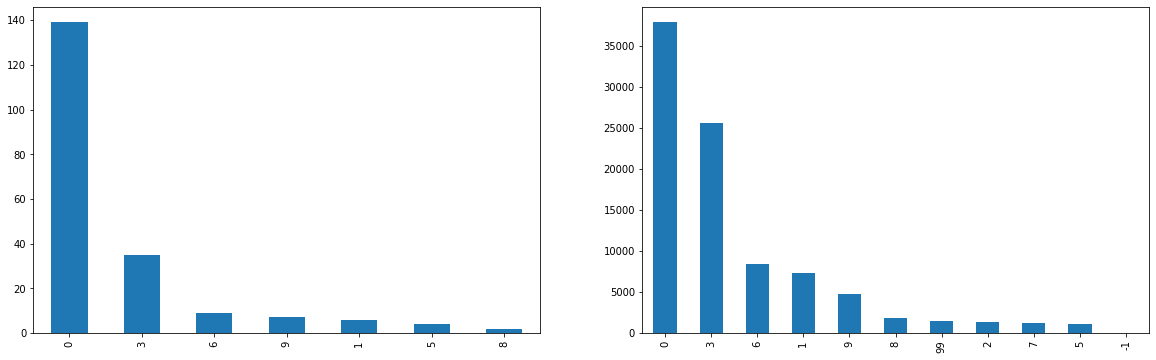

In [26]:
plt.subplot(1,2,1)
major_incidents['junction_detail'].value_counts().plot(kind='bar', figsize=(20,6))

plt.subplot(1,2,2)
minor_incidents['junction_detail'].value_counts().plot(kind='bar', figsize=(20,6))


plt.show()

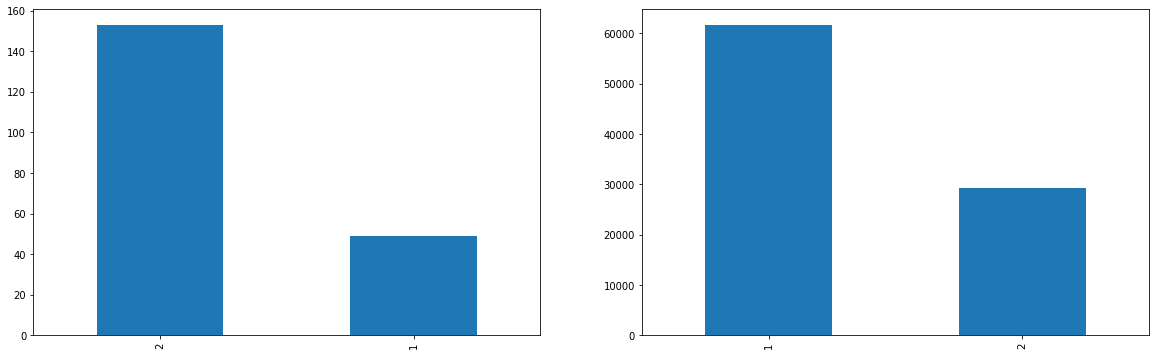

In [27]:
plt.subplot(1,2,1)
major_incidents['urban_or_rural_area'].value_counts().plot(kind='bar', figsize=(20,6))

plt.subplot(1,2,2)
minor_incidents['urban_or_rural_area'].value_counts().plot(kind='bar', figsize=(20,6))

plt.show()